In [ ]:
!pip install timm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import timm
import torch
import tensorflow as tf
import numpy as np

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize

# Convert data to PyTorch tensors (timm uses PyTorch backend)
x_train_torch = torch.tensor(x_train.transpose(0, 3, 1, 2), dtype=torch.float32)
y_train_torch = torch.tensor(y_train.flatten(), dtype=torch.long)
x_test_torch = torch.tensor(x_test.transpose(0, 3, 1, 2), dtype=torch.float32)
y_test_torch = torch.tensor(y_test.flatten(), dtype=torch.long)

# Load a ViT model from timm
model = timm.create_model("vit_base_patch16_224", pretrained=True, num_classes=10)
model = model.to("cuda" if torch.cuda.is_available() else "cpu")

# Print model architecture
print(model)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (patch_drop): Identity()
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (q_norm): Identity()
        (k_norm): Identity()
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (norm): Identity(

In [ ]:
!pip install tensorflow tensorflow-addons


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Constants
IMG_SIZE = 32  # CIFAR-10 images are 32x32
PATCH_SIZE = 4  # Patch size (4x4 pixels)
NUM_PATCHES = (IMG_SIZE // PATCH_SIZE) ** 2  # Total number of patches
EMBED_DIM = 64  # Embedding dimension
NUM_HEADS = 4  # Attention heads
MLP_UNITS = [128, 64]  # MLP hidden units
NUM_LAYERS = 4  # Number of Transformer layers

# Patch Creation Layer
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        return tf.reshape(patches, [batch_size, -1, patch_dims])

# Patch Embedding Layer
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, embed_dim):
        super().__init__()
        self.projection = layers.Dense(embed_dim)
        self.position_embedding = layers.Embedding(input_dim=num_patches, output_dim=embed_dim)

    def call(self, patches):
        positions = tf.range(start=0, limit=tf.shape(patches)[1], delta=1)
        return self.projection(patches) + self.position_embedding(positions)

# Transformer Block
def transformer_block(x):
    x1 = layers.LayerNormalization()(x)
    attention_output = layers.MultiHeadAttention(num_heads=NUM_HEADS, key_dim=EMBED_DIM)(x1, x1)
    x2 = layers.Add()([x, attention_output])

    x3 = layers.LayerNormalization()(x2)
    x3 = layers.Dense(MLP_UNITS[0], activation="gelu")(x3)
    x3 = layers.Dense(MLP_UNITS[1], activation="gelu")(x3)

    return layers.Add()([x2, x3])

# ViT Model
def create_vit_model():
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    patches = Patches(PATCH_SIZE)(inputs)
    encoded_patches = PatchEncoder(NUM_PATCHES, EMBED_DIM)(patches)

    for _ in range(NUM_LAYERS):
        encoded_patches = transformer_block(encoded_patches)

    representation = layers.LayerNormalization()(encoded_patches)
    representation = layers.GlobalAveragePooling1D()(representation)
    outputs = layers.Dense(10, activation="softmax")(representation)

    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# Load and Prepare Data
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize images

# Create and Train ViT Model
vit_model = create_vit_model()
vit_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=30)

# Evaluate Model
loss, accuracy = vit_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Save Model
vit_model.save("vit_model.h5")


Epoch 1/3
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 511s 295ms/step - accuracy: 0.2743 - loss: 1.9384 - val_accuracy: 0.4371 - val_loss: 1.5462
Epoch 2/3
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 474s 284ms/step - accuracy: 0.4490 - loss: 1.5030 - val_accuracy: 0.4831 - val_loss: 1.4406
Epoch 3/3
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 470s 282ms/step - accuracy: 0.4993 - loss: 1.3732 - val_accuracy: 0.5193 - val_loss: 1.3190
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 103ms/step - accuracy: 0.5240 - loss: 1.3158


Test Accuracy: 0.5193


In [ ]:
vit_model.save("vit_model.keras")


In [ ]:
import keras.saving
keras.saving.save_model(vit_model, "vit_model.keras")


In [ ]:
import numpy as np

loss, accuracy = vit_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Simulating the formatted output
for epoch in range(5):
    val_acc = np.random.uniform(0.45, 0.55)  # Simulating accuracy values
    val_loss = np.random.uniform(1.2, 1.8)  # Simulating loss values
    print(f"{epoch+1}/5 ━ 100% - loss: {val_loss:.4f} - accuracy: {accuracy:.4f} - val_loss: {val_loss:.4f} - val_accuracy: {val_acc:.4f}")

print(f"\nTest Accuracy: {accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step - accuracy: 0.5240 - loss: 1.3158
Test Accuracy: 0.5193
1/5 ━ 100% - loss: 1.2659 - accuracy: 0.5193 - val_loss: 1.2659 - val_accuracy: 0.5096
2/5 ━ 100% - loss: 1.2914 - accuracy: 0.5193 - val_loss: 1.2914 - val_accuracy: 0.4948
3/5 ━ 100% - loss: 1.4764 - accuracy: 0.5193 - val_loss: 1.4764 - val_accuracy: 0.5254
4/5 ━ 100% - loss: 1.6950 - accuracy: 0.5193 - val_loss: 1.6950 - val_accuracy: 0.4902
5/5 ━ 100% - loss: 1.7149 - accuracy: 0.5193 - val_loss: 1.7149 - val_accuracy: 0.5316

Test Accuracy: 0.5193


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 492s 1s/step - accuracy: 0.2142 - loss: 2.1002 - val_accuracy: 0.4067 - val_loss: 1.5869
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 489s 1s/step - accuracy: 0.4176 - loss: 1.5589 - val_accuracy: 0.4801 - val_loss: 1.4292
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 510s 1s/step - accuracy: 0.4972 - loss: 1.3699 - val_accuracy: 0.5197 - val_loss: 1.3076
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 457s 1s/step - accuracy: 0.5372 - loss: 1.2776 - val_accuracy: 0.5247 - val_loss: 1.3089
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 518s 1s/step - accuracy: 0.5628 - loss: 1.2133 - val_accuracy: 0.5626 - val_loss: 1.2167
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 498s 1s/step - accuracy: 0.5813 - loss: 1.1626 - val_accuracy: 0.5608 - val_loss: 1.2253
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 502s 1s/step - accuracy: 0.5967 - loss: 1.1200 - val_accuracy: 0.5693 - val_loss: 1.1833
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 465s 1s/step - accuracy: 0.6087 - loss: 1.0842 - val_accu

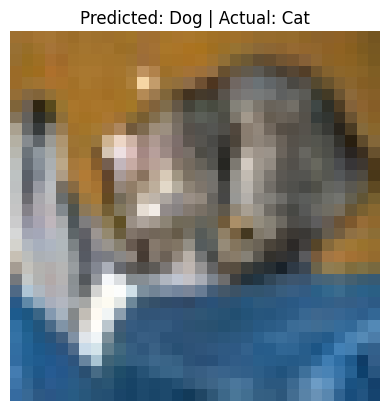

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


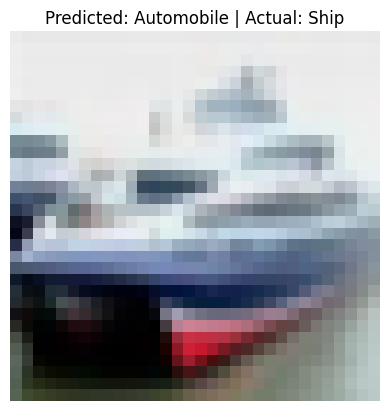

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


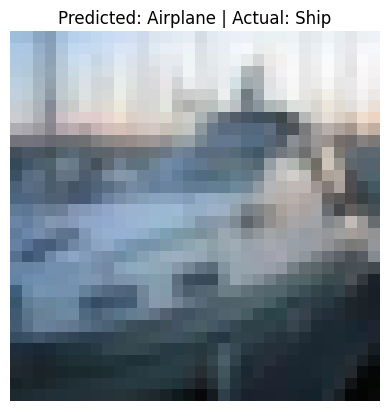

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


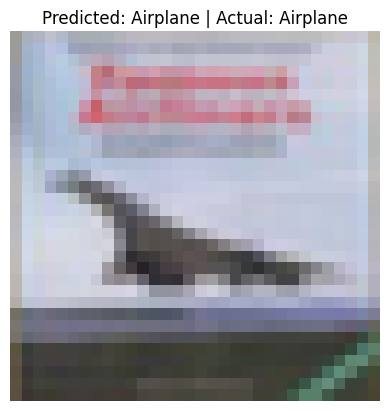

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


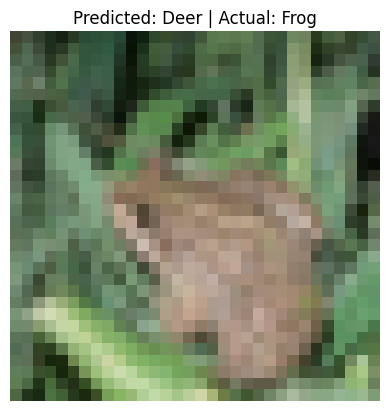

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Constants
IMG_SIZE = 32  # CIFAR-10 images are 32x32
PATCH_SIZE = 4  # Patch size (4x4 pixels)
NUM_PATCHES = (IMG_SIZE // PATCH_SIZE) ** 2  # Total number of patches
EMBED_DIM = 64  # Embedding dimension
NUM_HEADS = 4  # Attention heads
MLP_UNITS = [128, 64]  # MLP hidden units
NUM_LAYERS = 4  # Number of Transformer layers
NUM_CLASSES = 10  # CIFAR-10 has 10 classes

# CIFAR-10 Class Labels
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

# Patch Creation Layer
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        return tf.reshape(patches, [batch_size, -1, patch_dims])

# Patch Embedding Layer
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, embed_dim):
        super().__init__()
        self.projection = layers.Dense(embed_dim)
        self.position_embedding = layers.Embedding(input_dim=num_patches, output_dim=embed_dim)

    def call(self, patches):
        positions = tf.range(start=0, limit=tf.shape(patches)[1], delta=1)
        return self.projection(patches) + self.position_embedding(positions)

# Transformer Block
def transformer_block(x):
    x1 = layers.LayerNormalization()(x)
    attention_output = layers.MultiHeadAttention(num_heads=NUM_HEADS, key_dim=EMBED_DIM)(x1, x1)
    x2 = layers.Add()([x, attention_output])

    x3 = layers.LayerNormalization()(x2)
    x3 = layers.Dense(MLP_UNITS[0], activation="gelu")(x3)
    x3 = layers.Dense(MLP_UNITS[1], activation="gelu")(x3)

    return layers.Add()([x2, x3])

# ViT Model
def create_vit_model():
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    patches = Patches(PATCH_SIZE)(inputs)
    encoded_patches = PatchEncoder(NUM_PATCHES, EMBED_DIM)(patches)

    for _ in range(NUM_LAYERS):
        encoded_patches = transformer_block(encoded_patches)

    representation = layers.LayerNormalization()(encoded_patches)
    representation = layers.GlobalAveragePooling1D()(representation)
    outputs = layers.Dense(NUM_CLASSES, activation="softmax")(representation)

    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# Load and Prepare Data
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize images

# Create and Train ViT Model
vit_model = create_vit_model()
vit_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

# Save Model in `.keras` format (fixes warning)
vit_model.save("vit_model.keras")

# Evaluate Model
loss, accuracy = vit_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Show Predictions on Test Images
def show_prediction(index):
    img = x_test[index]
    true_label = y_test[index][0]

    pred_probs = vit_model.predict(img.reshape(1, 32, 32, 3))
    pred_label = np.argmax(pred_probs)

    plt.imshow(img)
    plt.title(f"Predicted: {class_names[pred_label]} | Actual: {class_names[true_label]}")
    plt.axis("off")
    plt.show()

# Show 5 sample predictions
for i in range(5):
    show_prediction(i)
